# Dataframes and visualisations:

In this notebook, I create more useable and relevant dataframes from the data collected by Maia. I then use these dataframes to create visualisations such as bar charts, word clouds and a few time series graphs for some of our more interesting observations.

In [1]:
import pandas as pd

In [2]:
acct_file = "data/reptweets.csv"
word_count_filename = "data/word_count.csv"
df_politicians = pd.read_csv(acct_file)
# csv file has trailing spaces on some column names, this insures there are no leading or trailing spaces
df_politicians.columns = df_politicians.columns.str.strip()
df_word_count = pd.read_csv(word_count_filename, low_memory=False)
# combines the two dataframes joining on the common handle column
df_party_word_count = pd.merge(df_politicians, df_word_count, how='inner', on='handle')
# get republicans
df_reps = df_party_word_count[df_party_word_count.party == 'R']
df_dems = df_party_word_count[df_party_word_count.party == 'D']
# get independants but only return the columns Word and Count
df_dem_words = df_party_word_count[df_party_word_count.party == 'D'][['Word', 'Count']]
df_rep_words = df_party_word_count[df_party_word_count.party == 'R'][['Word', 'Count']]

In [3]:
df_dem_sorted = df_dem_words.groupby(['Word']).sum().sort_values(by=["Count"], ascending = False)

In [4]:
df_dem_sorted.to_csv('C:/Users/Amara/Documents/GitHub/DS105_Group_Final_Project/democrat_word_counts.csv')

In [5]:
df_rep_sorted = df_rep_words.groupby(['Word']).sum().sort_values(by=["Count"], ascending = False)

In [6]:
df_rep_sorted.to_csv('C:/Users/Amara/Documents/GitHub/DS105_Group_Final_Project/republican_word_counts.csv')

In [7]:
df_democrats = pd.read_csv('democrat_word_counts.csv')

In [8]:
df_democrats

,Word,Count
0,today,106447
1,work,96303
2,more,90738
3,act,77729
4,need,76149
...,...,...
768,buildup,3
769,liberation,3
770,resources,3
771,hr,3


In [9]:
df_dems_top_50 = df_democrats.head(50)

In [10]:
dems_top_words = [x for x in df_dems_top_50['Word']]

In [11]:
df_republicans = pd.read_csv('republican_word_counts.csv')

In [12]:
df_reps_top_50 = df_republicans.head(50)

In [13]:
reps_top_words = [x for x in df_reps_top_50['Word']]

In [14]:
from plotnine import *

In [15]:
g_democrats = (
    ggplot(df_dems_top_50, aes(x="Word",y="Count")) + geom_col(colour='blue', fill='blue') + coord_flip() + theme(figure_size=[9,8]) + ggtitle("Bar graph showing the 50 most frequently used words by Democrats on Twitter")
)

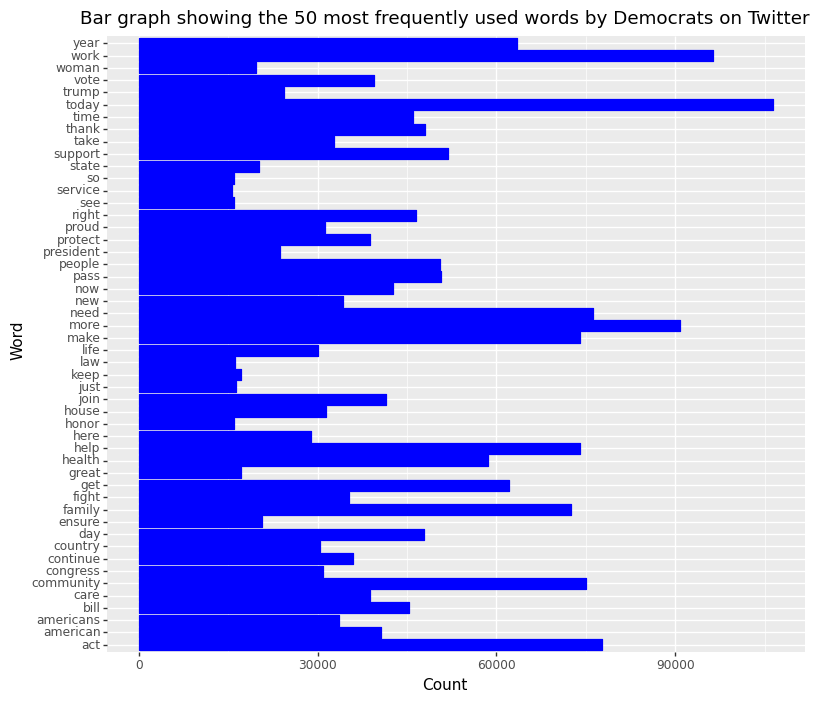

<ggplot: (161753400781)>

In [16]:
g_democrats

In [17]:
ggsave(plot = g_democrats, path = "C:/Users/Amara/Documents/GitHub/DS105_Group_Final_Project/figures")

C:\Users\Amara\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 9 x 8 in image.
C:\Users\Amara\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: C:\Users\Amara\Documents\GitHub\DS105_Group_Final_Project\figures\plotnine-save-161753400781.pdf


In [58]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

%matplotlib inline

In [ ]:
# Determine order and create a categorical type
# Note that value_counts() is already sorted
manufacturer_list = mpg['manufacturer'].value_counts().index.tolist()
manufacturer_cat = pd.Categorical(mpg['manufacturer'], categories=manufacturer_list)

# assign to a new column in the DataFrame
mpg = mpg.assign(manufacturer_cat = manufacturer_cat)

(ggplot(mpg)
 + aes(x='manufacturer_cat')
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

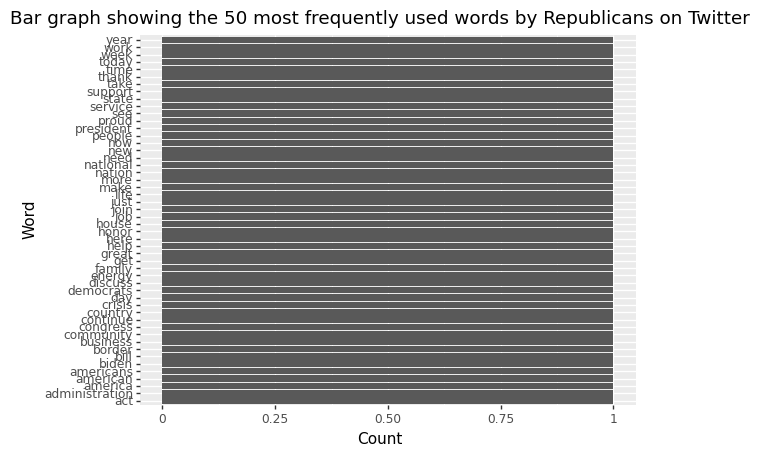

<ggplot: (162095153198)>

In [63]:
# Determine order and create a categorical type
# Note that value_counts() is already sorted
#manufacturer_list = mpg['manufacturer'].value_counts().index.tolist()
rep_words_list = df_reps_top_50['Word'].value_counts().index.tolist()
republicans_cat = pd.Categorical(df_reps_top_50['Word'], categories=reps_top_words)

# assign to a new column in the DataFrame
df_reps_top_50_cat = df_reps_top_50.assign(republicans_cat = republicans_cat)

(ggplot(df_reps_top_50_cat)
 + aes(x='Word', )
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='Word', title='Bar graph showing the 50 most frequently used words by Republicans on Twitter')
)

In [81]:
g_republicans = (
    ggplot(df_reps_top_50, aes(x= "Word", y="Count")) + geom_col(colour='red', fill='red') + coord_flip() + theme(figure_size=[9,8]) + ggtitle("Bar graph showing the 50 most frequently used words by Republicans on Twitter")
)

In [82]:
g_republicans = (
    ggplot(df_reps_top_50, aes(x= "reorder(Word, -Count"), y="Count")) + geom_bar(stat='identity') + labs(title = ('jhguf')) + xlab('jhfjhf') + ylab('figbj') + coord_flip()

TypeError: __init__() got an unexpected keyword argument 'y'

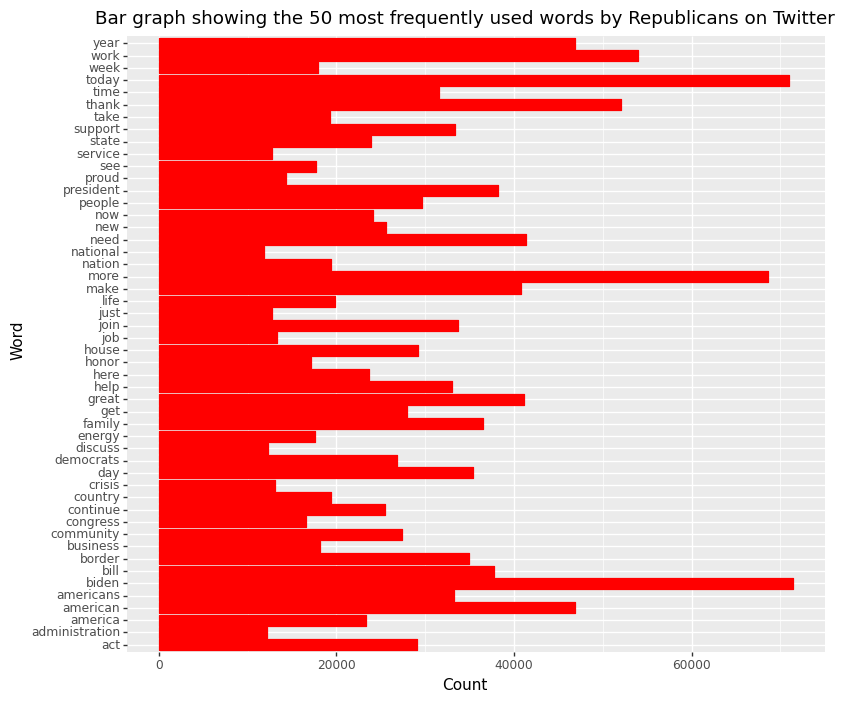

<ggplot: (162098667569)>

In [83]:
g_republicans

In [66]:
ggsave(plot = g_republicans, path = "C:/Users/Amara/Documents/GitHub/DS105_Group_Final_Project/figures")

C:\Users\Amara\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 9 x 8 in image.
C:\Users\Amara\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: C:\Users\Amara\Documents\GitHub\DS105_Group_Final_Project\figures\plotnine-save-162096982718.pdf


In [21]:
import matplotlib.pyplot as plt

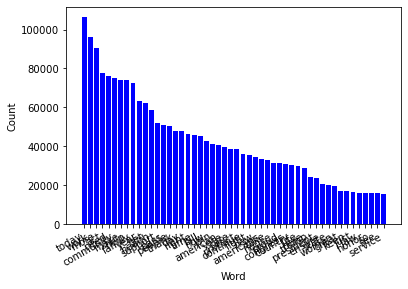

In [22]:
dems_counts = [x for x in df_dems_top_50['Count']]

plt.bar(dems_top_words, height = dems_counts, color = 'blue')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Count")
plt.xlabel("Word")
plt.savefig('figures/democrat_top_50.png', transparent = True)
plt.show()

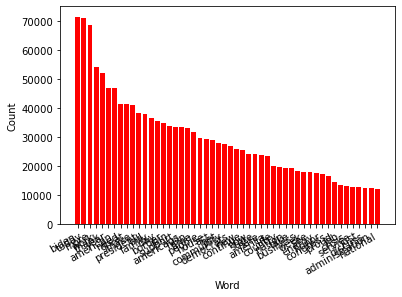

In [23]:
reps_counts = [x for x in df_reps_top_50['Count']]

plt.bar(reps_top_words, height = reps_counts, color = 'red')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Count")
plt.xlabel("Word")
plt.savefig('figures/republican_top_50.png', transparent = True)
plt.show()

## Wordclouds:

In [24]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

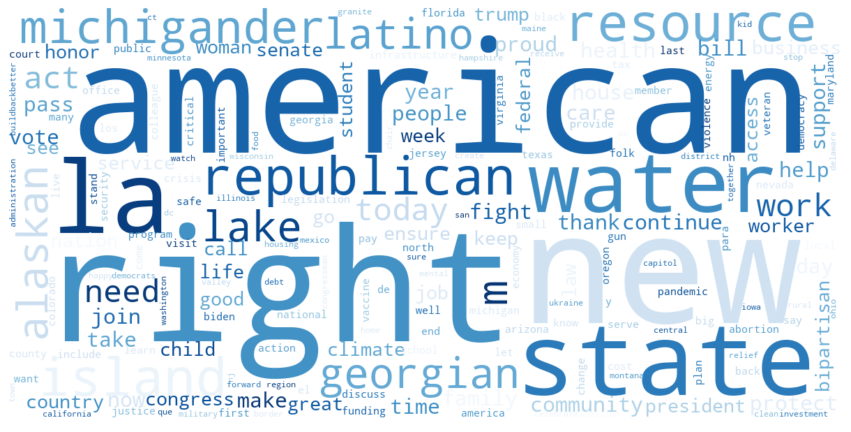

In [25]:
dtext = " ".join(i for i in df_democrats.Word)
dwordcloud = WordCloud(background_color="white", scale=3, colormap="Blues").generate(dtext)
plt.figure( figsize=(15,10))
plt.imshow(dwordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('figures/democrats_word_cloud.png')
plt.show()

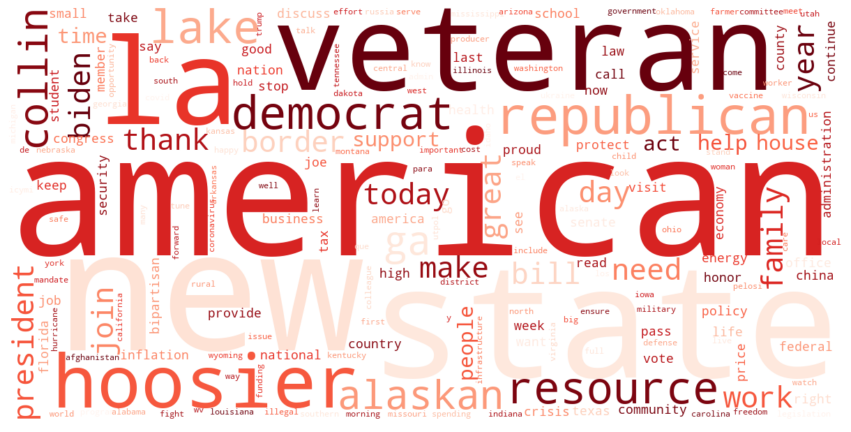

In [26]:
rtext = " ".join(i for i in df_republicans.Word)
rwordcloud = WordCloud(background_color="white", scale=3, colormap="Reds").generate(rtext)
plt.figure( figsize=(15,10))
plt.imshow(rwordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('figures/republicans_word_cloud.png')
plt.show()

In [27]:
import numpy as np

In [28]:
from PIL import Image

In [29]:
republican_mask = np.array(Image.open("C:/Users/Amara/Documents/DS105/Group_project/Images/republican_elephant.jpg"))

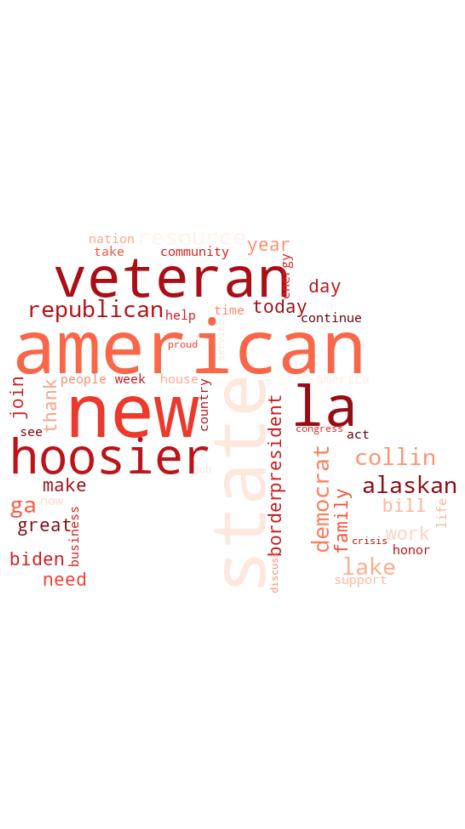

In [30]:
rwc2 = WordCloud(background_color="white", mask=republican_mask, max_words=200, scale=3, colormap="Reds").generate_from_text(rtext)
plt.figure( figsize=(10,15))
plt.imshow(rwc2, interpolation='bilinear')
plt.axis("off")
plt.savefig('figures/republican_elephant_word_cloud.png', transparent = True)
plt.show()

In [31]:
democrat_mask = np.array(Image.open("C:/Users/Amara/Documents/DS105/Group_project/Images/democrat_donkey.jpg"))

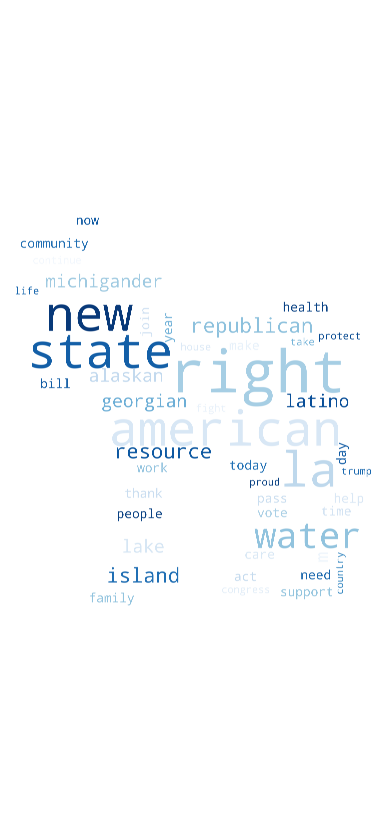

In [32]:
dwc2 = WordCloud(background_color="white", mask=democrat_mask, max_words=200, scale=100, colormap="Blues").generate_from_text(dtext)
plt.figure( figsize=(15,15))
plt.imshow(dwc2, interpolation='bilinear')
plt.axis("off")
plt.savefig('figures/democrat_donkey_word_cloud.png', transparent = True)
plt.show()

## Finding exclusive trends:

In [33]:
df_politicians.head()

,name,handle,state,party,branch
0,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate
1,"Barrasso, John",SenJohnBarrasso,WY,R,Senate
2,"Bennet, Michael F.",SenatorBennet,CO,D,Senate
3,"Blackburn, Marsha",MarshaBlackburn,TN,R,Senate
4,"Blumenthal, Richard",SenBlumenthal,CT,D,Senate


In [34]:
df_word_count.head()

,handle,Word,Count
0,AustinScottGA08,today,496
1,AustinScottGA08,thank,361
2,AustinScottGA08,georgia,292
3,AustinScottGA08,day,276
4,AustinScottGA08,more,274


In [35]:
df_party_word_count.head()

,name,handle,state,party,branch,Word,Count
0,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,wisconsin,934
1,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,work,846
2,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,support,618
3,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,need,532
4,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,health,482


In [39]:
with_dates = pd.read_csv('data/all_tweets.csv')

In [40]:
with_dates.tail()

,handle,name,tweet_id,author_id,lang,replied_to,created_at,tweet_text,possibly_sensitive,conversation_id,key_word_list
25,RepPeteAguilar,Rep. Pete Aguilar,1599432082735779840,3018670151,en,1599432082735779840,2022-12-04T15:54:59.000Z,RT @FaceTheNation: For the first time in more ...,False,1599432082735779840,"['rt', 'first', 'time', 'more', 'decade', 'hou..."
26,RepPeteAguilar,Rep. Pete Aguilar,1598776424617242624,3018670151,en,1598776424617242624,2022-12-02T20:29:38.000Z,My statement with @RepJeffries and @RepKClark ...,False,1598776424617242624,"['statement', 'condemn', 'antisemitism']"
27,RepPeteAguilar,Rep. Pete Aguilar,1598769566229766145,3018670151,en,1598769566229766145,2022-12-02T20:02:22.000Z,Today we mark the 7th anniversary of the deadl...,False,1598769566229766145,"['today', 'mark', 'anniversary', 'deadly', 'te..."
28,RepPeteAguilar,Rep. Pete Aguilar,1598357144159617026,3018670151,en,1598357144159617026,2022-12-01T16:43:33.000Z,"My statement on the election of @RepJoeNeguse,...",False,1598357144159617026,"['statement', 'election', 'chair', 'co', 'chai..."
29,RepPeteAguilar,Rep. Pete Aguilar,1598337669515419649,3018670151,en,1598337669515419649,2022-12-01T15:26:10.000Z,My statement on the election of @WhipClyburn a...,False,1598337669515419649,"['statement', 'election', 'assistant', 'democr..."


In [41]:
df_reps.head()

,name,handle,state,party,branch,Word,Count
50,"Barrasso, John",SenJohnBarrasso,WY,R,Senate,american,557
51,"Barrasso, John",SenJohnBarrasso,WY,R,Senate,energy,554
52,"Barrasso, John",SenJohnBarrasso,WY,R,Senate,wyoming,553
53,"Barrasso, John",SenJohnBarrasso,WY,R,Senate,biden,499
54,"Barrasso, John",SenJohnBarrasso,WY,R,Senate,today,451


In [42]:
republican_handles = []
for x in df_reps['handle']:
    if x not in republican_handles:
        republican_handles.append(x)

In [43]:
len(republican_handles)

264

In [44]:
df_dems.head()

,name,handle,state,party,branch,Word,Count
0,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,wisconsin,934
1,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,work,846
2,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,support,618
3,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,need,532
4,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,health,482


In [45]:
democrat_handles = []
for x in df_dems['handle']:
    if x not in democrat_handles:
        democrat_handles.append(x)

In [46]:
len(democrat_handles)

268

In [47]:
tweets = pd.read_csv("data/tweets.csv")
dates_tweets = tweets.drop(labels='name', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='tweet_id', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='author_id', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='lang', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='replied_to', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='possibly_sensitive', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='conversation_id', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise')

C:\Users\Amara\AppData\Local\Temp\ipykernel_23272\1132877888.py:1: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.


In [48]:
dates_tweets.head()

,handle,created_at,tweet_text,retweet_count,reply_count,like_count,quote_count,key_word_list
0,SenatorBaldwin,2022-12-09T18:56:26.000Z,Reminder: You have until January 15th to #GetC...,9.0,2.0,2.0,1.0,"['reminder', 'january', 'getcovered', 'quality..."
1,SenatorBaldwin,2022-12-08T22:16:10.000Z,Read more about our work to restore these pens...,9.0,4.0,4.0,1.0,"['read', 'more', 'work', 'restore', 'pension',..."
2,SenatorBaldwin,2022-12-08T22:16:09.000Z,"A pension is a promise, and today we ensured t...",25.0,15.0,15.0,4.0,"['pension', 'promise', 'today', 'ensure', 'pro..."
3,SenatorBaldwin,2022-12-08T19:38:46.000Z,"On Latina Equal Pay Day, we bring attention to...",13.0,8.0,8.0,1.0,"['latina', 'equal', 'pay', 'day', 'bring', 'at..."
4,SenatorBaldwin,2022-12-08T18:57:09.000Z,RT @RepStricklandWA: Access to safe &amp; lega...,17.0,0.0,0.0,0.0,"['access', 'safe', 'legal', 'reproductive', 'h..."


In [49]:
democrat_tweets = []
for i in range(len(dates_tweets)):
    if dates_tweets.iloc[i]['handle'] in democrat_handles:
        democrat_tweets.append(dates_tweets.iloc[i])

In [50]:
df_democrat_tweets = pd.DataFrame(democrat_tweets)

In [51]:
df_democrat_tweets.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/data/democrat_tweets.csv')

In [52]:
df_dem_tweets = pd.read_csv('data/democrat_tweets.csv')

In [53]:
df_dem_tweets.head()

,Unnamed: 0,handle,created_at,tweet_text,retweet_count,reply_count,like_count,quote_count,key_word_list
0,0,SenatorBaldwin,2022-12-09T18:56:26.000Z,Reminder: You have until January 15th to #GetC...,9.0,2.0,2.0,1.0,"['reminder', 'january', 'getcovered', 'quality..."
1,1,SenatorBaldwin,2022-12-08T22:16:10.000Z,Read more about our work to restore these pens...,9.0,4.0,4.0,1.0,"['read', 'more', 'work', 'restore', 'pension',..."
2,2,SenatorBaldwin,2022-12-08T22:16:09.000Z,"A pension is a promise, and today we ensured t...",25.0,15.0,15.0,4.0,"['pension', 'promise', 'today', 'ensure', 'pro..."
3,3,SenatorBaldwin,2022-12-08T19:38:46.000Z,"On Latina Equal Pay Day, we bring attention to...",13.0,8.0,8.0,1.0,"['latina', 'equal', 'pay', 'day', 'bring', 'at..."
4,4,SenatorBaldwin,2022-12-08T18:57:09.000Z,RT @RepStricklandWA: Access to safe &amp; lega...,17.0,0.0,0.0,0.0,"['access', 'safe', 'legal', 'reproductive', 'h..."


In [84]:
republican_tweets = []
for i in range(len(dates_tweets)):
    if dates_tweets.iloc[i]['handle'] in republican_handles:
        republican_tweets.append(dates_tweets.iloc[i])

In [85]:
df_republican_tweets = pd.DataFrame(republican_tweets)

In [86]:
df_republican_tweets.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/data/republican_tweets.csv')

In [87]:
df_rep_tweets = pd.read_csv('data/republican_tweets.csv')

In [88]:
df_rep_tweets.head()

,Unnamed: 0,handle,created_at,tweet_text,retweet_count,reply_count,like_count,quote_count,key_word_list
0,3249,SenJohnBarrasso,2022-12-09T20:17:10.000Z,Senator Lummis is a champion for western issue...,1.0,1.0,1.0,0.0,"['senator', 'lummis', 'champion', 'western', '..."
1,3250,SenJohnBarrasso,2022-12-09T19:16:37.000Z,Christmas is in full swing in downtown Torring...,2.0,5.0,5.0,0.0,"['christmas', 'full', 'swing', 'downtown', 'to..."
2,3251,SenJohnBarrasso,2022-12-09T15:57:44.000Z,RT @SenateGOP: https://t.co/lkLFJEZamb,46.0,0.0,0.0,0.0,[]
3,3252,SenJohnBarrasso,2022-12-09T15:41:03.000Z,Biden administration policies are causing anxi...,15.0,106.0,106.0,10.0,"['biden', 'administration', 'policy', 'cause',..."
4,3253,SenJohnBarrasso,2022-12-08T17:57:00.000Z,.@JoeBiden is swapping the “Merchant of Death”...,104.0,202.0,202.0,13.0,"['swap', 'merchant', 'death', 'leave', 'marine..."


In [89]:
reps_not_dems = []
for i in range(len(reps_top_words)):
    if reps_top_words[i] not in dems_top_words:
        reps_not_dems.append(reps_top_words[i])

In [90]:
reps_not_dems

['biden',
 'border',
 'democrats',
 'america',
 'nation',
 'business',
 'week',
 'energy',
 'job',
 'crisis',
 'discuss',
 'administration',
 'national']

In [91]:
dems_not_reps = []
for i in range(len(dems_top_words)):
    if dems_top_words[i] not in reps_top_words:
        dems_not_reps.append(dems_top_words[i])

In [92]:
dems_not_reps

['health',
 'pass',
 'right',
 'vote',
 'care',
 'protect',
 'fight',
 'trump',
 'ensure',
 'woman',
 'keep',
 'law',
 'so']

In [93]:
df_dems_top_50.head()

,Word,Count
0,today,106447
1,work,96303
2,more,90738
3,act,77729
4,need,76149


In [94]:
dems_only_words = []
for i in range(len(df_dems_top_50)):
    for word in dems_not_reps:
        if df_dems_top_50.iloc[i]['Word'] == word:
            dems_only_words.append(df_dems_top_50.iloc[i])

In [95]:
df_dems_only_words = pd.DataFrame(dems_only_words)

In [96]:
df_dems_only_words

,Word,Count
11,health,58538
13,pass,50680
17,right,46461
23,vote,39417
24,care,38835
25,protect,38782
27,fight,35326
37,trump,24363
39,ensure,20600
41,woman,19551


In [97]:
g_democrats_only = (
    ggplot(df_dems_only_words, aes(x="Word",y="Count")) + geom_col() + coord_flip() + theme(figure_size=[9,6])
)

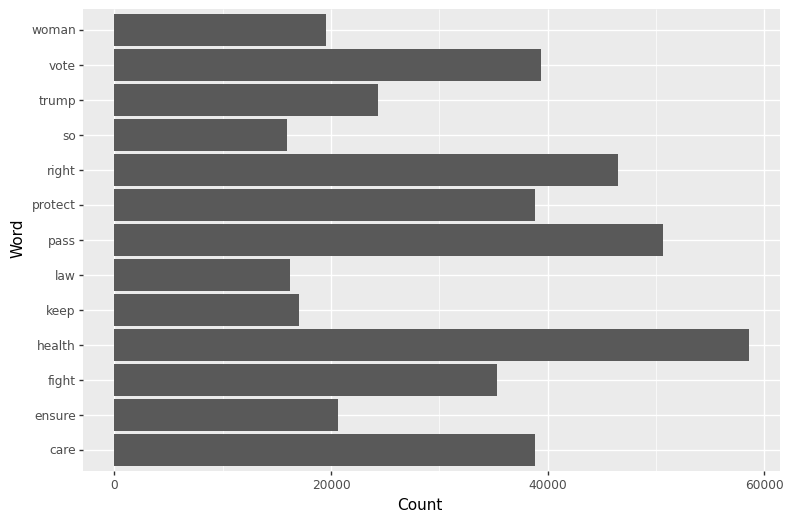

<ggplot: (162170271769)>

In [98]:
g_democrats_only

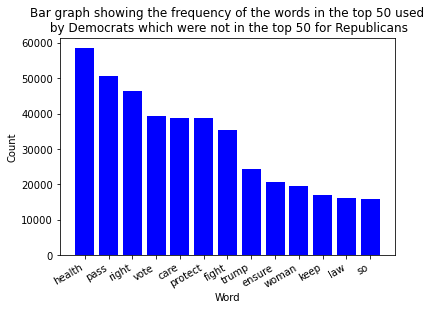

In [116]:
dem_counts = [x for x in df_dems_only_words['Count']]

plt.bar(dems_not_reps, height = dem_counts, color = 'blue')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Count")
plt.xlabel("Word")
plt.title("Bar graph showing the frequency of the words in the top 50 used\n by Democrats which were not in the top 50 for Republicans")
plt.savefig('figures/top_democrat_words_exclusive.png')
plt.show()

In [100]:
reps_only_words = []
for i in range(len(df_reps_top_50)):
    for word in reps_not_dems:
        if df_reps_top_50.iloc[i]['Word'] == word:
            reps_only_words.append(df_reps_top_50.iloc[i])

In [101]:
df_reps_only_words = pd.DataFrame(reps_only_words)

In [102]:
df_reps_only_words

,Word,Count
0,biden,71400
14,border,34900
25,democrats,26805
31,america,23274
34,nation,19385
36,business,18123
37,week,17966
39,energy,17584
43,job,13311
44,crisis,13099


In [103]:
g_republicans_only = (
    ggplot(df_reps_only_words, aes(x="Word",y="Count")) + geom_col() + coord_flip() + theme(figure_size=[9,6])
)

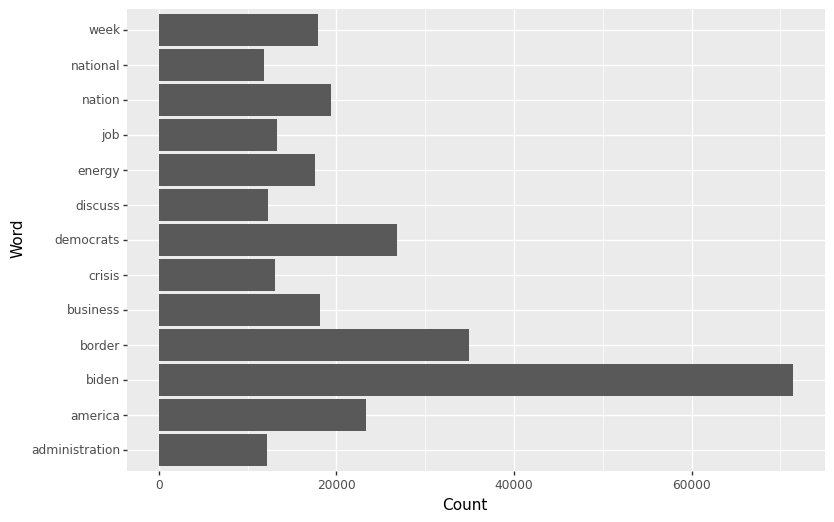

<ggplot: (162144858718)>

In [104]:
g_republicans_only

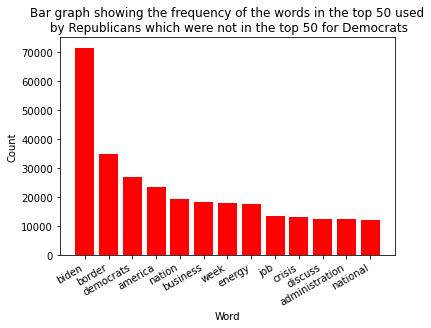

In [115]:
rep_counts = [x for x in df_reps_only_words['Count']]

plt.bar(reps_not_dems, height = rep_counts, color = 'red')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Count")
plt.xlabel("Word")
plt.title("Bar graph showing the frequency of the words in the top 50 used\n by Republicans which were not in the top 50 for Democrats")
plt.savefig('figures/top_republican_words_exclusive.png')
plt.show()

## Time series for 'border' by republicans:

In [106]:
border_dates = []
for i in range(len(df_rep_tweets)):
    if 'border' in df_rep_tweets.iloc[i]['key_word_list']:
        border_dates.append(df_rep_tweets.iloc[i]['created_at'][:10])

In [107]:
len(border_dates)

32961

In [108]:
counts = []
for i in range(len(border_dates)):
    counts.append(1)

In [109]:
border_df = pd.DataFrame(list(zip(border_dates, counts)),
               columns =['Date', 'Count'])

In [117]:
len(border_df)

32961

In [118]:
grouped_border_df = border_df.groupby(['Date']).sum()

In [119]:
grouped_border_df

,Count
Date,
2011-04-06,2
2011-04-07,2
2011-04-12,1
2011-06-02,1
2012-09-10,2
...,...
2022-12-17,2
2022-12-19,6
2022-12-20,7


In [122]:
grouped_border_df.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/data/grouped_border_df.csv')

In [123]:
df_grouped_border = pd.read_csv("data/grouped_border_df.csv")

In [124]:
df_grouped_border

,Date,Count
0,2011-04-06,2
1,2011-04-07,2
2,2011-04-12,1
3,2011-06-02,1
4,2012-09-10,2
...,...,...
1500,2022-12-17,2
1501,2022-12-19,6
1502,2022-12-20,7
1503,2022-12-21,6


In [125]:
border2022 = []
for i in range(len(df_grouped_border)):
    if '2022' in df_grouped_border.iloc[i]['Date']:
        border2022.append(df_grouped_border.iloc[i])

In [126]:
df_border2022 = pd.DataFrame(border2022)

In [127]:
df_border2022.head()

,Date,Count
1151,2022-01-01,13
1152,2022-01-02,10
1153,2022-01-03,36
1154,2022-01-04,47
1155,2022-01-05,44


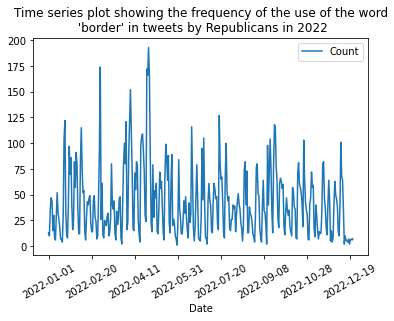

In [152]:
df_border2022.plot(x = 'Date', y = 'Count')
plt.xticks(rotation=30)
plt.title('Time series plot showing the frequency of the use of the word\n \'border\' in tweets by Republicans in 2022')
plt.savefig('figures/rep_border_2022')

## Time series for 'biden' by republicans:

In [133]:
biden_dates = []
for i in range(len(df_rep_tweets)):
    if 'biden' in df_rep_tweets.iloc[i]['key_word_list']:
        biden_dates.append(df_rep_tweets.iloc[i]['created_at'][:10])

In [134]:
len(biden_dates)

72880

In [135]:
biden_counts = []
for i in range(len(biden_dates)):
    biden_counts.append(1)

In [136]:
biden_df = pd.DataFrame(list(zip(biden_dates, biden_counts)),
               columns =['Date', 'Count'])

In [137]:
len(biden_df)

72880

In [138]:
grouped_biden_df = biden_df.groupby(['Date']).sum()

In [139]:
grouped_biden_df

,Count
Date,
2010-02-02,1
2013-01-24,1
2013-10-13,1
2013-11-21,1
2014-09-24,1
...,...
2022-12-18,3
2022-12-19,10
2022-12-20,11


In [141]:
grouped_biden_df.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/data/grouped_biden_df.csv')

In [142]:
df_grouped_biden = pd.read_csv("data/grouped_biden_df.csv")

In [143]:
biden2022 = []
for i in range(len(df_grouped_biden)):
    if '2022' in df_grouped_biden.iloc[i]['Date']:
        biden2022.append(df_grouped_biden.iloc[i])

In [144]:
df_biden2022 = pd.DataFrame(biden2022)

In [145]:
df_biden2022

,Date,Count
651,2022-01-01,17
652,2022-01-02,17
653,2022-01-03,82
654,2022-01-04,98
655,2022-01-05,112
...,...,...
1002,2022-12-18,3
1003,2022-12-19,10
1004,2022-12-20,11
1005,2022-12-21,10


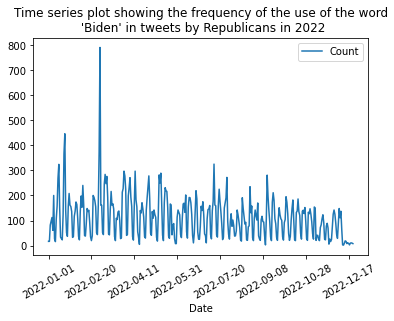

In [153]:
df_biden2022.plot(x = 'Date', y = 'Count')
plt.xticks(rotation=30)
plt.title('Time series plot showing the frequency of the use of the word\n \'Biden\' in tweets by Republicans in 2022')
plt.savefig('figures/rep_biden_2022')

In [154]:
df_biden2022.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/data/df_biden2022.csv')

## Time series for 'Trump' by democrats

In [157]:
trump_dates = []
for i in range(len(df_dem_tweets)):
    if 'trump' in df_dem_tweets.iloc[i]['key_word_list']:
        trump_dates.append(df_dem_tweets.iloc[i]['created_at'][:10])

In [158]:
len(trump_dates)

32410

In [159]:
trump_counts = []
for i in range(len(trump_dates)):
    trump_counts.append(1)

In [160]:
trump_df = pd.DataFrame(list(zip(trump_dates, trump_counts)),
               columns =['Date', 'Count'])

In [161]:
len(trump_df)

32410

In [162]:
grouped_trump_df = trump_df.groupby(['Date']).sum()

In [163]:
grouped_trump_df

,Count
Date,
2015-12-08,5
2016-06-05,1
2016-06-14,1
2016-07-14,1
2016-07-16,1
...,...
2022-12-09,1
2022-12-10,4
2022-12-16,3


In [171]:
grouped_trump_df.to_csv('C:/Users/Amara/Documents/GitHub/DS105_Group_Final_Project/data/grouped_trump_df.csv')

In [172]:
df_grouped_trump = pd.read_csv("data/grouped_trump_df.csv")

In [173]:
df_grouped_trump

,Date,Count
0,2015-12-08,5
1,2016-06-05,1
2,2016-06-14,1
3,2016-07-14,1
4,2016-07-16,1
...,...,...
2125,2022-12-09,1
2126,2022-12-10,4
2127,2022-12-16,3
2128,2022-12-19,11


In [174]:
trump2022 = []
for i in range(len(df_grouped_trump)):
    if '2022' in df_grouped_trump.iloc[i]['Date']:
        trump2022.append(df_grouped_trump.iloc[i])

In [175]:
df_trump2022 = pd.DataFrame(trump2022)

In [176]:
df_trump2022.head()

,Date,Count
1784,2022-01-01,2
1785,2022-01-02,3
1786,2022-01-03,8
1787,2022-01-04,7
1788,2022-01-05,25


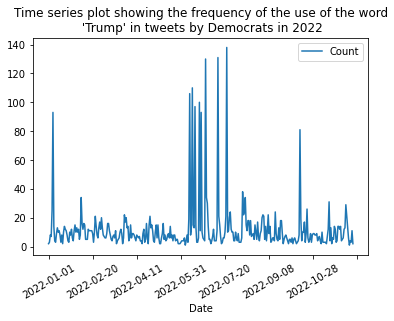

In [177]:
df_trump2022.plot(x = 'Date', y = 'Count')
plt.xticks(rotation=30)
plt.title('Time series plot showing the frequency of the use of the word\n \'Trump\' in tweets by Democrats in 2022')
plt.savefig('figures/dem_trump_2022')

## User engagement visualisations:

In [155]:
df_dem_tweets.head()

,Unnamed: 0,handle,created_at,tweet_text,retweet_count,reply_count,like_count,quote_count,key_word_list
0,0,SenatorBaldwin,2022-12-09T18:56:26.000Z,Reminder: You have until January 15th to #GetC...,9.0,2.0,2.0,1.0,"['reminder', 'january', 'getcovered', 'quality..."
1,1,SenatorBaldwin,2022-12-08T22:16:10.000Z,Read more about our work to restore these pens...,9.0,4.0,4.0,1.0,"['read', 'more', 'work', 'restore', 'pension',..."
2,2,SenatorBaldwin,2022-12-08T22:16:09.000Z,"A pension is a promise, and today we ensured t...",25.0,15.0,15.0,4.0,"['pension', 'promise', 'today', 'ensure', 'pro..."
3,3,SenatorBaldwin,2022-12-08T19:38:46.000Z,"On Latina Equal Pay Day, we bring attention to...",13.0,8.0,8.0,1.0,"['latina', 'equal', 'pay', 'day', 'bring', 'at..."
4,4,SenatorBaldwin,2022-12-08T18:57:09.000Z,RT @RepStricklandWA: Access to safe &amp; lega...,17.0,0.0,0.0,0.0,"['access', 'safe', 'legal', 'reproductive', 'h..."


In [ ]:
dem_word_data_avg = {}
for word in dems_not_reps:
    num_tweets = 0
    word_likes = 0
    word_reply = 0
    word_retweet = 0
    for i in range(len(df_dem_tweets)):
        if word in df_dem_tweets.iloc[i]['key_word_list']:
            num_tweets += 1
            word_likes += df_dem_tweets.iloc[i]['like_count']
            word_reply += df_dem_tweets.iloc[i]['reply_count']
            word_retweet += df_dem_tweets.iloc[i]['retweet_count']
    dem_word_data_avg[word] = [word_likes/num_tweets, word_reply/num_tweets, word_retweet/num_tweets]

In [ ]:
dem_word_data_avg

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

d_avg_likes = []
for word in dems_not_reps:
    d_avg_likes.append(dem_word_data_avg[word][0])
d_avg_replies = []
for word in dems_not_reps:
    d_avg_replies.append(dem_word_data_avg[word][1])
d_avg_retweets = []
for word in dems_not_reps:
    d_avg_retweets.append(dem_word_data_avg[word][2])
    
dd = {"Word": dems_not_reps, "Likes": d_avg_likes, "Replies": d_avg_replies, "Retweets": d_avg_retweets}

df = pd.DataFrame(dd)
df.set_index('Word').plot(kind="bar", align='center', width=0.1)
plt.tick_params(rotation=45)

plt.show()

In [ ]:
df_rep_tweets.head()

In [ ]:
rep_word_data_avg = {}
for word in reps_not_dems:
    num_tweets = 0
    word_likes = 0
    word_reply = 0
    word_retweet = 0
    for i in range(len(df_rep_tweets)):
        if word in df_rep_tweets.iloc[i]['key_word_list']:
            num_tweets += 1
            word_likes += df_rep_tweets.iloc[i]['like_count']
            word_reply += df_rep_tweets.iloc[i]['reply_count']
            word_retweet += df_rep_tweets.iloc[i]['retweet_count']
    rep_word_data_avg[word] = [word_likes/num_tweets, word_reply/num_tweets, word_retweet/num_tweets]

In [ ]:
rep_word_data_avg

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

r_avg_likes = []
for word in reps_not_dems:
    r_avg_likes.append(rep_word_data_avg[word][0])
r_avg_replies = []
for word in reps_not_dems:
    r_avg_replies.append(rep_word_data_avg[word][1])
r_avg_retweets = []
for word in reps_not_dems:
    r_avg_retweets.append(rep_word_data_avg[word][2])
    
rd = {"Word": reps_not_dems, "Likes": r_avg_likes, "Replies": r_avg_replies, "Retweets": r_avg_retweets}

rdf = pd.DataFrame(rd)
rdf.set_index('Word').plot(kind="bar", align='center', width=0.1)
plt.tick_params(rotation=45)

plt.show()

In [ ]:
rdf.head()

In [ ]:
# Plotting side by side bar graphs:

# http://www.cookbook-r.com/Graphs/Bar_and_line_graphs_(ggplot2)/
# R Graphics Cookbook by Winston Chang Reference
# Result of heads or tails in x = axis, Counts as y axis, diff colours for each player.
# Put labels:

ggplot(rdf, aes(x = Result, y = Freq, fill = Player)) + 
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75) + 
ylim(0,800) + 
geom_text(aes(label = Freq), 
          fontface = "bold", vjust = 1.5, 
          position = position_dodge(.9), size = 4) + 
labs(x = "\n Word", y = "Count\n", title = "\n User engagement statistics \n") + 
theme(plot.title = element_text(hjust = 0.5), 
      axis.title.x = element_text(face="bold", colour="red", size = 12), 
      axis.title.y = element_text(face="bold", colour="red", size = 12), 
      legend.title = element_text(face="bold", size = 10))

In [ ]:
# Facet_grid:

ggplot(data = rdf, aes(x = Word, y = Freq)) +
  geom_bar(stat = "identity", alpha = 0.7) +
  facet_grid(. ~Word)  +
  ylim(0,800) +
  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5, colour = "white", size = 4) +
  labs(x = "\n Coin Flip Outcome", y = "Frequency\n", title = "\n Coin Flip Results \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="darkgreen", size = 12),
        axis.title.y = element_text(face="bold", colour="darkgreen", size = 12),
        legend.title = element_text(face="bold", size = 10),
        strip.background = element_rect(fill="lightblue", colour="black", size=1),
        strip.text = element_text(face="bold", size=rel(1.2)))

In [ ]:
# Plotting side by side bar graphs:

# http://www.cookbook-r.com/Graphs/Bar_and_line_graphs_(ggplot2)/
# R Graphics Cookbook by Winston Chang Reference
# Result of heads or tails in x = axis, Counts as y axis, diff colours for each player.
# Put labels:

ggplot(data = results, aes(x = Result, y = Freq, fill = Player)) +
  geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +
  ylim(0,800) +
  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n Coin Flip Outcome", y = "Frequency\n", title = "\n Coin Flip Results \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))
